In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600
import seaborn as sns
import scipy.stats as stats
from matplotlib import cm
import matplotlib.colors as colors

In [73]:
# Importing the data from the 5-FC resistance assay
# ("spontaneous" resistants after CRISPR reinsertion of the WT F3F4 fragment)
resistance_rate = pd.read_csv('Data_for_SFigs/5FC_resistance_WT_24_04.csv')

In [74]:
# Adding NAT resistance and putative LOF in percentage
resistance_rate['Percent_NAT'] = (resistance_rate['NAT_colonies'] / resistance_rate['5FC_colonies']) * resistance_rate['Percent_resistant']
resistance_rate['Percent_LOF'] = resistance_rate['Frequency_non_cassettes'] * 100
resistance_rate = resistance_rate.fillna(0)

In [75]:
resistance_rate

,Fragment,Replicate,Dilution,Percent_resistant,5FC_colonies,NAT_colonies,Frequency_non_cassettes,Percent_NAT,Percent_LOF
0,3,1,01_percent,0.025,73,0.0,0.000250,0.000000,0.025000
1,3,1,05_percent,0.033,20,0.0,0.000330,0.000000,0.033000
2,3,2,01_percent,0.000,0,0.0,0.000000,0.000000,0.000000
3,3,2,05_percent,0.000,0,0.0,0.000000,0.000000,0.000000
4,4,1,05_percent,0.340,203,80.0,0.002060,0.133990,0.206010
5,4,1,1_percent,0.360,108,60.0,0.001600,0.200000,0.160000
6,4,2,05_percent,0.410,246,86.0,0.002667,0.143333,0.266667
7,4,2,1_percent,0.400,119,49.0,0.002353,0.164706,0.235294
8,3+4,1,05_percent,0.340,202,45.0,0.002643,0.075743,0.264257
9,3+4,1,1_percent,0.390,117,30.0,0.002900,0.100000,0.290000


In [76]:
# Renaming the fragment
frag_dict = {'3': 'F3', '4': 'F4', '3+4': 'F3-F4'}
resistance_rate['Fragment'] = resistance_rate['Fragment'].apply(lambda x: frag_dict[x])

resistance_rate = resistance_rate.rename(columns={'Fragment': 'WT reinsertion'})

# Removing the F3+F4 reinsertion, since the F3-F4 deletion is not discussed in the paper
resistance_rate = resistance_rate[resistance_rate['WT reinsertion'] != 'F3-F4'].copy().reset_index(drop=True)

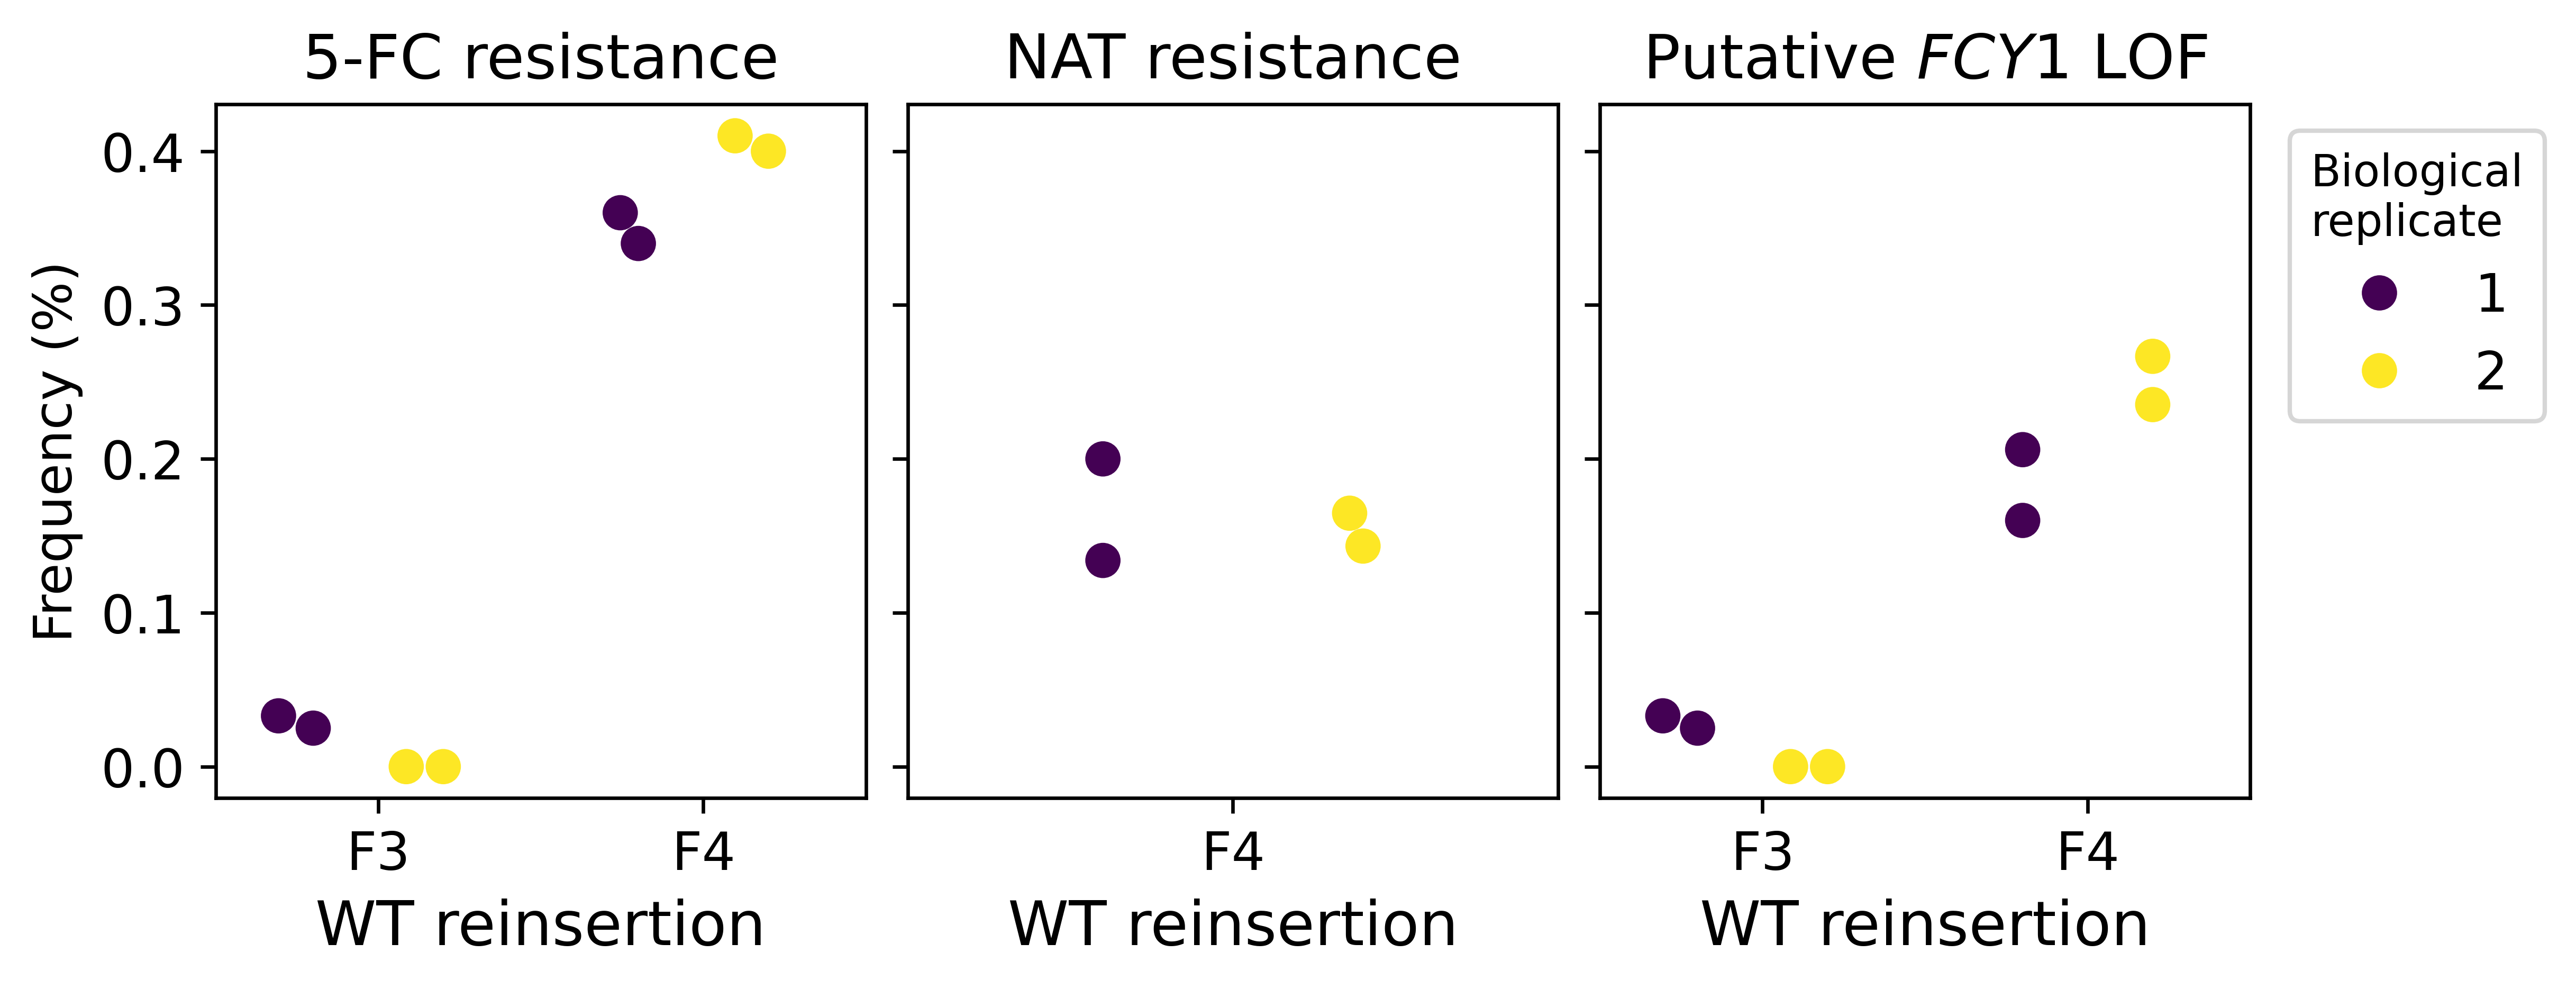

In [86]:
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["axes.labelsize"] = 14

# Costructing the figure
fig, axs = plt.subplots(1,3, constrained_layout=True, figsize=(8, 3),
                        sharey=True)

swarm_5FC = sns.swarmplot(x='WT reinsertion', y='Percent_resistant', hue='Replicate',
                          data=resistance_rate, ax=axs[0], dodge=True,
                          palette='viridis', size=8)
swarm_5FC.legend([],[], frameon=False)

swarm_NAT = sns.swarmplot(x='WT reinsertion', y='Percent_NAT', hue='Replicate',
                          data=resistance_rate[resistance_rate['WT reinsertion'] != 'F3'],
                          ax=axs[1], dodge=True,
                          palette='viridis', size=8)
swarm_NAT.legend([],[], frameon=False)

swarm_LOF = sns.swarmplot(x='WT reinsertion', y='Percent_LOF',
                          data=resistance_rate, hue='Replicate',
                          ax=axs[2], dodge=True,
                          palette='viridis', size=8)

swarm_LOF.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='large',
                 title='Biological\nreplicate')

axs[0].set_ylabel(r"Frequency (%)", fontsize=12)

axs[0].set_title('5-FC resistance', fontsize=14)
axs[1].set_title('NAT resistance', fontsize=14)
axs[2].set_title(r"Putative $\it{FCY1}$ LOF", fontsize=14)

FigS5 = plt.gcf()
FigS5.savefig('Supp_figs/S5Fig.tiff', bbox_inches='tight')